<h2>Numpy II e Matplotlib</h2>

<h3>Broadcasting com Numpy</h3>

Basicamente, trata-se de operações entre matrizes usando Arrays do Numpy

- Soma de um escalar com um Array
    - Cada escalar é somado para cada elemento do Array individualmente

In [1]:
import numpy as np

A = np.arange(16).reshape(4,4)

B = 3 + A

print('A:\n',A,'\nB:\n',B)

A:
 [[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]] 
B:
 [[ 3  4  5  6]
 [ 7  8  9 10]
 [11 12 13 14]
 [15 16 17 18]]


Quando efetuamos uma soma usando um vetor, o tamanho do vetor deve coincidir com o número de colunas da Matriz que desejamos somar.

Além disso, o vetor será replicado pelas 'i' linhas da Matriz

In [2]:
C = np.arange(4)

D = C + A

print(D)

[[ 0  2  4  6]
 [ 4  6  8 10]
 [ 8 10 12 14]
 [12 14 16 18]]


<h3>Broadcasting e operações entre matrizes</h3>

Podemos também realizar uma multiplicação, entretanto, não é igual à multiplicação com matrizes, mas, realizada para cada elemento

In [3]:
E = C*A

print('C\n',C)
print('A\n',A)
print('E = C x A\n',E)

C
 [0 1 2 3]
A
 [[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]]
E = C x A
 [[ 0  1  4  9]
 [ 0  5 12 21]
 [ 0  9 20 33]
 [ 0 13 28 45]]


O broadcasting é realizado nas colunas quando o vetor é uma coluna

In [4]:
vetor_coluna = np.arange(4).reshape(4,1)

F = vetor_coluna * A

print(F)

[[ 0  0  0  0]
 [ 4  5  6  7]
 [16 18 20 22]
 [36 39 42 45]]


Podemos também somar vetores linha e vetores coluna, que retornarão uma matriz i x j, onde i é o número de linhas do vetor-coluna e j o número de colunas do vetor-linha

In [5]:
vetor_linha = np.arange(7)

M = vetor_coluna + vetor_linha


print(vetor_linha)
print(vetor_coluna)
print(M)

[0 1 2 3 4 5 6]
[[0]
 [1]
 [2]
 [3]]
[[0 1 2 3 4 5 6]
 [1 2 3 4 5 6 7]
 [2 3 4 5 6 7 8]
 [3 4 5 6 7 8 9]]


O Broadcasting também é válido com atribuições

In [6]:
Z = np.zeros((5,3))

Z[:3] = [1,2,3]

print(Z)

[[1. 2. 3.]
 [1. 2. 3.]
 [1. 2. 3.]
 [0. 0. 0.]
 [0. 0. 0.]]


O comando np.newaxis atua como um reshape, pois introduz o novo eixo, o que faz com que o broadcasting seja agora feito nas colunas, não nas linhas

In [7]:
teste_newaxis = np.arange(5)

Z[:] = teste_newaxis[:,np.newaxis]

print(Z)

[[0. 0. 0.]
 [1. 1. 1.]
 [2. 2. 2.]
 [3. 3. 3.]
 [4. 4. 4.]]


<h3>Comparações</h3>

Conforme verificamos em máscaras booleanas, podemos comparar os elementos internos da matriz

In [8]:
A = np.arange(15).reshape(3,5)

B = (A % 2 == 0)

print(B)

[[ True False  True False  True]
 [False  True False  True False]
 [ True False  True False  True]]


Podemos também comparar se todos os elementos respondem positivamente a um determinado critério

In [9]:
# verifica se todos os valores de B são true
print(np.all(B))

False


Também podemos comparar se dois arrays são efetivamente iguais

In [10]:
X = np.arange(8).reshape(2,4)
Y = np.copy(X)
Z = np.arange(1,9).reshape(2,4)

print('Array X\n',X)
print('Array Y\n',Y)
print('Array Z\n',Z)

print('X é igual a Y?',np.array_equal(X,Y))
print('X é igual a Z?',np.array_equal(X,Z))

Array X
 [[0 1 2 3]
 [4 5 6 7]]
Array Y
 [[0 1 2 3]
 [4 5 6 7]]
Array Z
 [[1 2 3 4]
 [5 6 7 8]]
X é igual a Y? True
X é igual a Z? False


<h3>Reduções</h3>

Podemos usar métodos para agrupar informações:

- max

- min

- mean

- sum

In [11]:
A = np.arange(20).reshape(4,5)

print('Máx:',np.max(A))
print('Mín:',np.min(A))
print('Média:',np.mean(A))
print('Soma:',np.sum(A))

Máx: 19
Mín: 0
Média: 9.5
Soma: 190


As reduções podem também ser feitas por linhas e colunas, especificando o eixo (axis) em questão. 

Nesse ponto, vale ressaltar que o eixo especificado é o de locomoção

Por exemplo...

axis=0 irá fazer com que a operação ocorra através do eixo 0 (abscissas), realizando operações nas colunas

axis=1 irá fazer com que a operação ocorra através do eixo 1 (ordenadas), realizando oeprações nas linhas

In [12]:
Z = np.zeros((4,5))

Z[:] = np.arange(5)

print('Matriz Z\n',Z)
print('Soma das linhas:',np.sum(Z,axis=1))
print('Soma das colunas:',np.sum(Z,axis=0))

Matriz Z
 [[0. 1. 2. 3. 4.]
 [0. 1. 2. 3. 4.]
 [0. 1. 2. 3. 4.]
 [0. 1. 2. 3. 4.]]
Soma das linhas: [10. 10. 10. 10.]
Soma das colunas: [ 0.  4.  8. 12. 16.]


<h3>Reduções Lógicas</h3>

- any: verifica se algum dos itens de uma matriz, linha ou coluna satisfaz uma determinada condição

- all: verifica se todos os itens de uma matriz, linha ou coluna satisfazem uma determinada condição

In [13]:
mascara_booleana = (Z == 0)

print('Máscara booleana\n',mascara_booleana,'\n')
print('Todos os elementos iguais a zero?',mascara_booleana.all(),'\n')
print('Algum elemento igual a zero?',mascara_booleana.any())
print('Todos os elementos da coluna iguais a zero?',mascara_booleana.all(axis=0))
print('Todos os elementos da linha iguais a zero?',mascara_booleana.all(axis=1))

Máscara booleana
 [[ True False False False False]
 [ True False False False False]
 [ True False False False False]
 [ True False False False False]] 

Todos os elementos iguais a zero? False 

Algum elemento igual a zero? True
Todos os elementos da coluna iguais a zero? [ True False False False False]
Todos os elementos da linha iguais a zero? [False False False False]


<h3>Ordenação do Array</h3>

- A.sort(): irá ordenar o próprio array A, linha por linha

- B = np.sort(A): irá ordenar o array B, linha por linha, mantendo A intacto

In [14]:
# testando a ordenação real da matriz

A = np.random.randint(low=0, high=30, size=(5,5))

print('Matriz A antes de ordenar\n',A)

A.sort()

print('\nMatriz A após ordenar\n',A)

Matriz A antes de ordenar
 [[23 22 26  0 19]
 [26 29  9 15 22]
 [ 6 11 14  7 14]
 [15 14 11  6 14]
 [21  4 22  5 21]]

Matriz A após ordenar
 [[ 0 19 22 23 26]
 [ 9 15 22 26 29]
 [ 6  7 11 14 14]
 [ 6 11 14 14 15]
 [ 4  5 21 21 22]]


In [15]:
# testando a ordenação virtual da matriz

A = np.random.randint(low='0', high='30', size=(5,5))

print('Matriz A antes da ordenação\n',A)

B = np.sort(A)

print('\nMatriz A após a ordenação\n',A)

print('\nMatriz B\n',B)

Matriz A antes da ordenação
 [[23 26 19  4  9]
 [ 6 11  8  2 10]
 [ 4 23 29  0  4]
 [ 6 22  8 23 27]
 [10 29  1  1 12]]

Matriz A após a ordenação
 [[23 26 19  4  9]
 [ 6 11  8  2 10]
 [ 4 23 29  0  4]
 [ 6 22  8 23 27]
 [10 29  1  1 12]]

Matriz B
 [[ 4  9 19 23 26]
 [ 2  6  8 10 11]
 [ 0  4  4 23 29]
 [ 6  8 22 23 27]
 [ 1  1 10 12 29]]


Pode-se também aplicar a ordenação às colunas

In [16]:
A = np.random.randint(low='0', high='30', size=(5,5))

print('Matriz A antes da ordenação por coluna\n',A)

A.sort(axis=0)

print('\nMatriz A após a ordenação por coluna\n',A)

Matriz A antes da ordenação por coluna
 [[18 11 13  8  2]
 [19  8  6 20 13]
 [17 17  1  8  3]
 [27  3 24 26 12]
 [21 28 25 14 24]]

Matriz A após a ordenação por coluna
 [[17  3  1  8  2]
 [18  8  6  8  3]
 [19 11 13 14 12]
 [21 17 24 20 13]
 [27 28 25 26 24]]


<h3>Argsort</h3>

Esse método ordena a matriz e, ao invés de retornar o conteúdo, representa os índices da organização original, nas novas posições

In [17]:
A = np.random.randint(low='0', high='30', size=(3,3))

print('Matriz A antes da ordenação por coluna\n',A)

B = np.argsort(A)

print('\nMatriz B, contendo a matriz A ordenada por índices\n',B)

Matriz A antes da ordenação por coluna
 [[ 1 17 10]
 [29 17 24]
 [10 27  2]]

Matriz B, contendo a matriz A ordenada por índices
 [[0 2 1]
 [1 2 0]
 [2 0 1]]


<h3>Multiplicação matricial e vetorial</h3>

- usa-se o comando 'dot' e necessariamente elas tem que ser compatíveis

- $C_{ik} = A_{ij} * B_{jk}$

In [18]:
A = np.arange(10).reshape(2,5)

B = np.arange(10).reshape(5,2)

C = np.dot(A,B)

print('Matriz A\n',A)
print('\nMatriz B\n',B)
print('\nMatriz C\n',C)

Matriz A
 [[0 1 2 3 4]
 [5 6 7 8 9]]

Matriz B
 [[0 1]
 [2 3]
 [4 5]
 [6 7]
 [8 9]]

Matriz C
 [[ 60  70]
 [160 195]]


<h3>Matplotlib</h3>

Permite a geração de gráficos usando a biblioteca Matplotlib e Pyplot

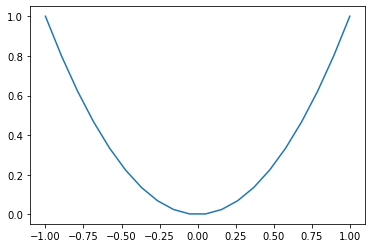

In [19]:
import matplotlib.pyplot as plt

%matplotlib inline 

x = np.linspace(-1,1,20)
y = x**2

plt.plot(x,y)

Delimitando o tamanho do eixo

- plt.axis$([x_o,x_f,y_o,y_f])$

(-1.5, 1.5, -0.1, 1.1)

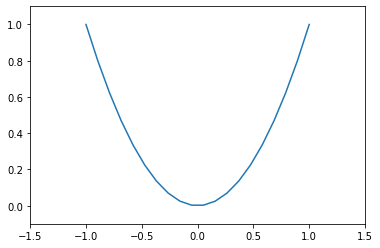

In [20]:
import matplotlib.pyplot as plt

%matplotlib inline 

x = np.linspace(-1,1,20)
y = x**2

plt.plot(x,y)
plt.axis([-1.5,1.5,-0.1,1.1])

Podemos incrementar a visualização, passando **kwargs para o comando plt.plot

- color: cor da linha

- linewidth: espessura da linha

- linestyle: estilo da linha... dashed, dash-dot, etc

- marker: marcador dos pontos

- label: utilizado para especificar uma legenda, quando esse método está ativo

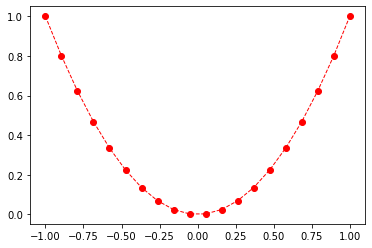

In [21]:
plt.plot(x, y, color='red', linewidth=1, linestyle='--', marker='o')

Pode-se incluir diversos plots ao mesmo tempo

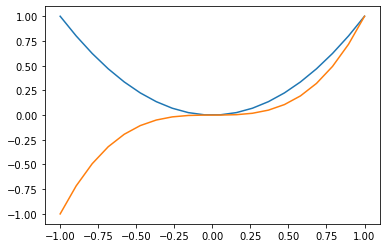

In [22]:
g = lambda t:t**3

plt.plot(x,y,x,g(x))

[None, None]

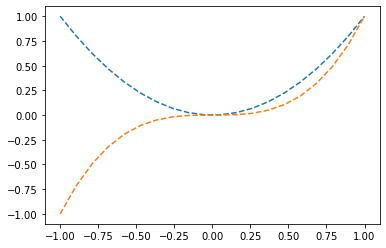

In [23]:
# deve-se declarar um objeto de plot
plt_x2_x3 = plt.plot(x,y,x,g(x))
plt.setp(plt_x2_x3,linestyle='--')

<h3>Subplot</h3>

- Podemos também gerar vários gráficos em janelas distintas, dentro do mesmo plot, usando o Subplot

- Sintaxe geral
    >> plt.subplot(linhas, colunas, elemento)
    
    >> plt.plot(objeto_abscissas, objeto_ordenadas, **kwargs)

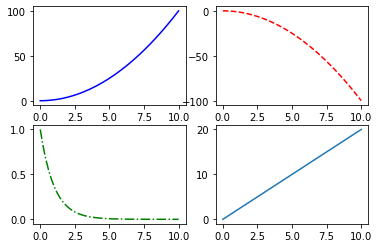

In [24]:
import numpy as np
import matplotlib.pyplot as plt

f = lambda x:x**2
g = lambda x:-x**2
h = lambda x:np.exp(-x)
j = lambda x:2*x


X = np.linspace(0,10,50)

plt.subplot(2,2,1)
plt.plot(X,f(X), color='blue')

plt.subplot(2,2,2)
plt.plot(X,g(X),color='red', linestyle='--')

plt.subplot(2,2,3)
plt.plot(X,h(X),color='green', linestyle='-.')

plt.subplot(2,2,4)
plt.plot(X,j(X))

<h3>Textos em gráficos</h3>

Alguns do métodos úteis são:

- text(): adiciona um texto a um ponto específico da tela
- xlabel(): adiciona uma label ao eixo 'x'
- ylabel(): adiciona uma label ao eixo 'y'
- title(): adiciona um título ao gráfico
- annotate(): adiciona uma anotação, com uma seta opcional

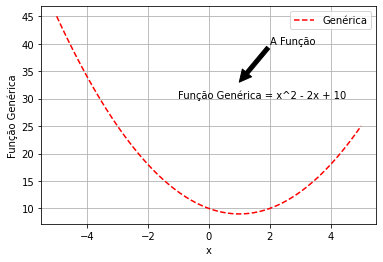

In [25]:
funcao_generica = lambda x:x**2-2*x+10

x = np.linspace(-5,5,100)

meu_grafico = plt.plot(x,funcao_generica(x))
plt.setp(meu_grafico, color='red', linestyle='--', label='Genérica')
plt.xlabel('x')
plt.ylabel('Função Genérica')
plt.text(-1,30,'Função Genérica = x^2 - 2x + 10')
plt.annotate('A Função', xy=(1,33), xytext=(2,40),arrowprops=dict(facecolor='black'))
plt.legend()
plt.grid()

Legendas são facilmente geradas, simplesmente acionando o método:

- plt.legend()

- Para tal, deve-se ter enunciado uma label para o gráfico